In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
total_data = pd.merge(city_data, ride_data, on='city', how='outer')

# Display the data table for preview
total_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Bubble Plot of Ride Sharing Data

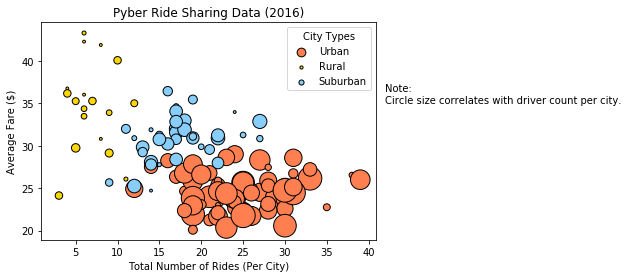

In [2]:
# Obtain the x and y coordinates for each of the three city types
type_urban = total_data[total_data['type'] == 'Urban'].groupby([total_data['city']])
type_rural = total_data[total_data['type'] == 'Rural'].groupby([total_data['city']])
type_suburban = total_data[total_data['type'] == 'Suburban'].groupby([total_data['city']])

x_axis_urban = type_urban['ride_id'].count()
y_axis_urban = type_urban['fare'].mean()
size_urban = type_urban['driver_count'].mean()

x_axis_rural = type_rural['ride_id'].count()
y_axis_rural = type_rural['fare'].mean()
size_rural = type_rural['driver_count'].mean()

x_axis_suburban = type_suburban['ride_id'].count()
y_axis_suburban = type_suburban['fare'].mean()
size_suburban = type_suburban['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(x_axis_urban, y_axis_urban, label = 'Urban', s=size_urban * 8, color=['coral'], edgecolor='black', marker='o')
plt.scatter(x_axis_rural, y_axis_rural, label = 'Rural', s=size_rural * 8, color=['gold'], edgecolor='black', marker='o')
plt.scatter(x_axis_suburban, y_axis_suburban, label = 'Suburban', s=size_suburban * 8, color=['lightskyblue'],
            edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
plt.legend(title='City Types', loc='best', markerscale = 0.5) 

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('../Images/PyberRideSharingData.png')

# Show plot
plt.show()

Total Fares by City Type

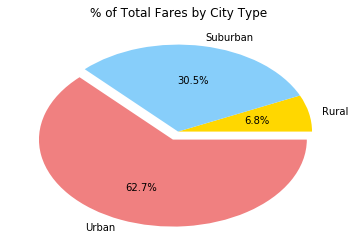

In [3]:
# Calculate Type Percents
types = total_data.groupby(['type'])
fare_total = types['fare'].sum()

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(fare_total, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('../Images/TotalFaresbyCityType.png')

# Show Figure
plt.show()

Total Rides by City Type

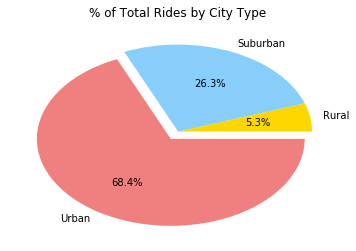

In [4]:
# Calculate Ride Percents
ride_count = types['ride_id'].count()

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('../Images/TotalRidesbyCityType.png')

# Show Figure
plt.show()

Total Drivers by City Type

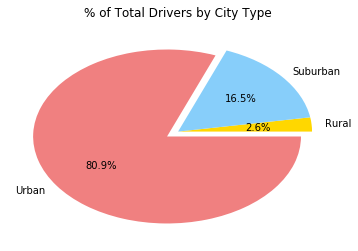

In [5]:
# Calculate Driver Percents
driver_type = city_data.groupby(['type'])
driver_total = driver_type['driver_count'].sum()

# Build Pie Charts
labels = ['Rural','Suburban','Urban']
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(driver_total, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('../Images/TotalDriversbyCityType.png')

# Show Figure
plt.show()

- These services are most popular in urban areas by far, declining greatly as it becomes more rural
- There is an inverse relationship between the number of fares and their average cost
- Suburban routes seem to have the most consistency in its fare cost and ride numbers between its cities